# <h1 align=center> **PROYECTO INDIVIDUAL Nº2**
## <h1 align=center> **Data Analysis**
## <h3 align=center> **Salomón Orozco Jaramillo**
---

## Contenido Y Contexto
---

<p>En el archivo presente se muestra el proceso de creación de un proyecto en el área de data analysis que tiene el tema principal acerca de los siniestros viales.</p>
<div>
<H3> Objetivos: </H3>


* Elaboración de un proyecto de análisis de datos:
    * Generar información para tomar medidas para disminuir la cantidad de víctimas.



<H3> Pasos a seguir:</H3>

* Importar librerias
* Procesamiento de datos
    * Manejo de datos
    * Manejo y Limpieza de datos nulos
    * Manejo y limpieza de datos duplicados
    * Creación de datasets opcionales o complementarios
* Análisis de datos
    * Estadística descriptiva (Tendencias)
    * Interrelación entre los datos
* Conclusiones

## Importar librerias
---

In [430]:
# Importing the factorial function from the math module
from math import factorial
# Importing the stats module from scipy library and aliasing it as st
from scipy import stats as st
# Importing the matplotlib library and aliasing it as mpl
import matplotlib as mpl
# Importing the pyplot module from the matplotlib library and aliasing it as plt
import matplotlib.pyplot as plt
# Importing the MultipleLocator class from the matplotlib.ticker module
from matplotlib.ticker import MultipleLocator
# Importing the LinearSegmentedColormap class from the matplotlib.colors module
from matplotlib.colors import LinearSegmentedColormap
# Importing the seaborn library and aliasing it as sns
import seaborn as sns
# Importing the pandas library and aliasing it as pd
import pandas as pd
# Importing the numpy library and aliasing it as np
import numpy as np
# Importing the express module from the plotly library and aliasing it as px
import plotly.express as px
# Importing the graph_objects module from the plotly library and aliasing it as go
import plotly.graph_objects as go
# Import the pyproj library
import pyproj
# Import the Transformer class from the pyproj module
from pyproj import Transformer
transform_location = Transformer.from_crs("epsg:32610", "epsg:4326")


In [431]:
# Functions of the EDA
def xy_to_lat_long(x, y):  # Function to convert XY coordinates to latitude and longitude
    longitude, latitude = transform_location.transform(x, y)
    return longitude, latitude
# Should be changed... the transformer library has its own transform function...

## Procesamiento de datos
---

In [432]:
# Read the Excel file containing injury data into a DataFrame
lesiones_df = pd.read_excel('datasets/lesiones.xlsx', sheet_name='HECHOS')
# Read the Excel file containing homicide data into a DataFrame
homicidios_df = pd.read_excel('datasets/homicidios.xlsx', sheet_name='HECHOS')

In [433]:
# Display the first 3 rows of the homicide DataFrame
homicidios_df.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [434]:
# Normalize names of all columns
homicidios_df.columns = homicidios_df.columns.str.lower()
homicidios_df.columns = homicidios_df.columns.str.replace(' ', '_')
homicidios_df.columns = homicidios_df.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8') # Remove non-ASCII characters from column names

In [435]:
homicidios_df.head(0)

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,...,altura,cruce,direccion_normalizada,comuna,xy_(caba),pos_x,pos_y,participantes,victima,acusado


In [436]:
# Date transformation and creation of auxiliary date fields
homicidios_df['fecha'] = pd.to_datetime(homicidios_df['fecha'])  # Convert 'fecha' column to datetime format
homicidios_df['dia_semana'] = homicidios_df['fecha'].dt.dayofweek  # Extract day of the week from 'fecha' and store in 'dia_semana' column
homicidios_df['hh'] = pd.to_numeric(homicidios_df['hh'], errors='coerce')  # Convert 'hh' column to numeric, handle errors by coercing to NaN
homicidios_df['period'] = homicidios_df['fecha'].dt.strftime('%y%m')  # Extract year and month from 'fecha' and store in 'period' col homicidios_df

In [437]:
# Coordinate transformation
homicidios_df['pos_x'] = pd.to_numeric(homicidios_df['pos_x'], errors='coerce')  # Convert 'pos_x' column to numeric, handle errors by coercing to NaN
homicidios_df['pos_y'] = pd.to_numeric(homicidios_df['pos_y'], errors='coerce')  # Convert 'pos_y' column to numeric, handle errors by coercing to NaN

# Pre-delete pos_x and pos_y before making logintude and latitude columns
homicidios_df = homicidios_df.dropna(subset=['pos_x', 'pos_y'])

# Apply the function to each row of the DataFrame and create new 'longitud' and 'latitud' columns
homicidios_df[['longitude', 'latitude']] = homicidios_df.apply(lambda row: pd.Series(xy_to_lat_long(row['pos_x'], row['pos_y'])), axis=1)

In [438]:
# Show homicios dataframe
homicidios_df.head(3)

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,lugar_del_hecho,tipo_de_calle,...,xy_(caba),pos_x,pos_y,participantes,victima,acusado,dia_semana,period,longitude,latitude
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,4,1601,-0.000313,-127.489268
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,5,1601,-0.000313,-127.489268
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7.0,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,6,1601,-0.000312,-127.489267


In [439]:
homicidios_df.columns

Index(['id', 'n_victimas', 'fecha', 'aaaa', 'mm', 'dd', 'hora', 'hh',
       'lugar_del_hecho', 'tipo_de_calle', 'calle', 'altura', 'cruce',
       'direccion_normalizada', 'comuna', 'xy_(caba)', 'pos_x', 'pos_y',
       'participantes', 'victima', 'acusado', 'dia_semana', 'period',
       'longitude', 'latitude'],
      dtype='object')

In [440]:
# Auxiliary field
homicidios_df['evento_tipo'] = "d"  # Create new column 'evento_tipo' and assign value "d" to all rows meaning death

In [441]:
# Count nulls and duplicates
print('Duplicados')
print(homicidios_df.duplicated().sum())
print('\nNulos')
null_counts = homicidios_df.isnull().sum()  # Calculate null counts for each column
# Iterate over null counts and print only if count is greater than 0
for column, count in null_counts.items():
    if count > 0:
        print(f"{column}: {count}")


Duplicados
0

Nulos
hh: 1
altura: 555
cruce: 159


In [442]:
homicidios_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 0 to 695
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     684 non-null    object        
 1   n_victimas             684 non-null    int64         
 2   fecha                  684 non-null    datetime64[ns]
 3   aaaa                   684 non-null    int64         
 4   mm                     684 non-null    int64         
 5   dd                     684 non-null    int64         
 6   hora                   684 non-null    object        
 7   hh                     683 non-null    float64       
 8   lugar_del_hecho        684 non-null    object        
 9   tipo_de_calle          684 non-null    object        
 10  calle                  684 non-null    object        
 11  altura                 129 non-null    float64       
 12  cruce                  525 non-null    object        
 13  direccion_

In [443]:
# Remove rows where the field is null... less than 15 rows doesn't make much of a diference, doesn't affect more than 10% of all rows
homicidios_df = homicidios_df.dropna(subset=['hh', 'direccion_normalizada'])

In [444]:
# Drop the specified columns from the DataFrame, wi'll dont use them
homicidios_df = homicidios_df.drop(['calle', 'altura', 'cruce', 'xy_(caba)', 'hora'], axis=1)


In [445]:
# Count nulls
print('Nulos')
null_counts = homicidios_df.isnull().sum()  # Calculate null counts for each column
# Iterate over null counts and print only if count is greater than 0
for column, count in null_counts.items():
    if count > 0:
        print(f"{column}: {count}")

Nulos


In [446]:
# Buenos aires has 1-15 'comunas' so the 0 value doesn't count
# Display rows where the 'comuna' column has a value of 0
homicidios_with_zero_comuna = homicidios_df[homicidios_df['comuna'] == 0]
homicidios_with_zero_comuna

,id,n_victimas,fecha,aaaa,mm,dd,hh,lugar_del_hecho,tipo_de_calle,direccion_normalizada,...,pos_x,pos_y,participantes,victima,acusado,dia_semana,period,longitude,latitude,evento_tipo


In [447]:
# Display unique values in the 'comuna' column
unique_comuna_values = homicidios_df['comuna'].unique()
print(unique_comuna_values)


[ 8  9  1 11 15  4  7 12  3 13 14 10  6  2  5]


In [448]:
homicidios_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     683 non-null    object        
 1   n_victimas             683 non-null    int64         
 2   fecha                  683 non-null    datetime64[ns]
 3   aaaa                   683 non-null    int64         
 4   mm                     683 non-null    int64         
 5   dd                     683 non-null    int64         
 6   hh                     683 non-null    float64       
 7   lugar_del_hecho        683 non-null    object        
 8   tipo_de_calle          683 non-null    object        
 9   direccion_normalizada  683 non-null    object        
 10  comuna                 683 non-null    int64         
 11  pos_x                  683 non-null    float64       
 12  pos_y                  683 non-null    float64       
 13  participan

In [449]:
# Reorder the columns
homicidios_df.columns

Index(['id', 'n_victimas', 'fecha', 'aaaa', 'mm', 'dd', 'hh',
       'lugar_del_hecho', 'tipo_de_calle', 'direccion_normalizada', 'comuna',
       'pos_x', 'pos_y', 'participantes', 'victima', 'acusado', 'dia_semana',
       'period', 'longitude', 'latitude', 'evento_tipo'],
      dtype='object')

In [450]:
# Define the desired column order
new_order = [
    'id', 'n_victimas', 'victima', 'participantes', 'acusado', 'fecha', 'aaaa', 'mm', 'period', 'dd', 'dia_semana', 'hh',
    'lugar_del_hecho', 'tipo_de_calle', 'direccion_normalizada', 'comuna',
    'pos_x', 'pos_y', 'longitude', 'latitude', 'evento_tipo'
]

# Reorder the columns in the DataFrame
homicidios_df = homicidios_df[new_order]


In [451]:
homicidios_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     683 non-null    object        
 1   n_victimas             683 non-null    int64         
 2   victima                683 non-null    object        
 3   participantes          683 non-null    object        
 4   acusado                683 non-null    object        
 5   fecha                  683 non-null    datetime64[ns]
 6   aaaa                   683 non-null    int64         
 7   mm                     683 non-null    int64         
 8   period                 683 non-null    object        
 9   dd                     683 non-null    int64         
 10  dia_semana             683 non-null    int32         
 11  hh                     683 non-null    float64       
 12  lugar_del_hecho        683 non-null    object        
 13  tipo_de_ca

In [452]:
# Now we work on the 'lesiones_df' 
lesiones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

In [453]:
# Rename the columns in the 'lesiones' DataFrame
lesiones_df.rename(columns={'latutid': 'latitude', 'longitud': 'longitude'}, inplace=True)


In [454]:
# Convert 'latitud' column to numeric, handle errors by coercing to NaN
lesiones_df['latitude'] = pd.to_numeric(lesiones_df['latitude'], errors='coerce')
# Convert 'longitud' column to numeric, handle errors by coercing to NaN
lesiones_df['longitude'] = pd.to_numeric(lesiones_df['longitude'], errors='coerce')
# Define a coordinate transformer from EPSG:4326 (WGS84) to EPSG:3857 (Web Mercator)
transformer = pyproj.Transformer.from_crs("epsg:4326", "epsg:3857", always_xy=True)
# Transform latitude and longitude coordinates to Web Mercator x and y coordinates
lesiones_df['pos_x'], lesiones_df['pos_y'] = transformer.transform(lesiones_df['longitude'].values, lesiones_df['latitude'].values)

In [455]:
# Convert the 'fecha' column to datetime format
lesiones_df['fecha'] = pd.to_datetime(lesiones_df['fecha'])
# Extract the day of the week from the 'fecha' column and store it in 'dia_semana' column
lesiones_df['dia_semana'] = lesiones_df['fecha'].dt.dayofweek
# Extract the year and month from the 'fecha' column, format it as YYMM, and store it in 'period' column
lesiones_df['period'] = lesiones_df['fecha'].dt.strftime('%y%m')
# Convert the 'franja_hora' column to numeric, handle errors by coercing to NaN, and store it in 'hh' column
lesiones_df['hh'] = pd.to_numeric(lesiones_df['franja_hora'], errors='coerce')


In [456]:
# Assign values from 'direccion_normalizada' column to 'lugar_del_hecho' column
lesiones_df['lugar_del_hecho'] = lesiones_df['direccion_normalizada']
# Convert the 'comuna' column to numeric, handle errors by coercing to NaN
lesiones_df['comuna'] = pd.to_numeric(lesiones_df['comuna'], errors='coerce')


In [457]:
# Combine values from 'victima' and 'acusado' columns, separated by a hyphen, and assign to 'participantes' column
lesiones_df['participantes'] = lesiones_df['victima'] + "-" + lesiones_df['acusado']
# Assign the string "l" to all rows in the 'evento_tipo' column meaning lesion
lesiones_df['evento_tipo'] = "l"


In [458]:
# Now we check Nulls and duplicates in the dataframe
print('Duplicados')
print(homicidios_df.duplicated().sum())
print('\nNulos')
null_counts = lesiones_df.isnull().sum()  # Calculate null counts for each column
# Iterate over null counts and print only if count is greater than 0
for column, count in null_counts.items():
    if count > 0:
        print(f"{column}: {count}")

Duplicados
0

Nulos
franja_hora: 5
direccion_normalizada: 53
comuna: 1457
calle: 10918
altura: 11014
cruce: 14378
geocodificacion_CABA: 39
longitude: 1471
latitude: 1471
moto: 93
auto: 93
transporte_publico: 93
camion: 93
ciclista: 93
pos_x: 1471
pos_y: 1471
hh: 9
lugar_del_hecho: 53


In [459]:
# Check columns on the dataframe and info
print(lesiones_df.columns)
print('\n')
print(lesiones_df.info())

Index(['id', 'n_victimas', 'aaaa', 'mm', 'dd', 'fecha', 'hora', 'franja_hora',
       'direccion_normalizada', 'comuna', 'tipo_calle', 'otra_direccion',
       'calle', 'altura', 'cruce', 'geocodificacion_CABA', 'longitude',
       'latitude', 'victima', 'acusado', 'participantes', 'moto', 'auto',
       'transporte_publico', 'camion', 'ciclista', 'gravedad', 'pos_x',
       'pos_y', 'dia_semana', 'period', 'hh', 'lugar_del_hecho',
       'evento_tipo'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     23785 non-null  object        
 1   n_victimas             23785 non-null  int64         
 2   aaaa                   23785 non-null  int64         
 3   mm                     23785 non-null  int64         
 4   dd                     23785 non-null  int64     

In [460]:
# Count occurrences of 'SD' in each column of the DataFrame meaning (Sin_Datos)
sd_counts = (lesiones_df == 'SD').sum()
sd_counts += (lesiones_df =='sd').sum()
# Total count of 'SD' across all columns
total_sd_count = sd_counts.sum()
print("Total count of 'SD' across all columns:", total_sd_count)
print("\nCounts of 'SD' in each column:")
print(sd_counts)


Total count of 'SD' across all columns: 158272

Counts of 'SD' in each column:
id                           0
n_victimas                   0
aaaa                         0
mm                           0
dd                           0
fecha                        0
hora                         9
franja_hora                  4
direccion_normalizada    10815
comuna                       0
tipo_calle               11045
otra_direccion           18295
calle                        0
altura                       0
cruce                        0
geocodificacion_CABA      1213
longitude                    0
latitude                     0
victima                  10733
acusado                  15288
participantes                0
moto                      8511
auto                     12543
transporte_publico       11801
camion                   12708
ciclista                 11353
gravedad                 23139
pos_x                        0
pos_y                        0
dia_semana            

In [461]:
# We got a lot of SD and sd in some columns, but we'll change it for a Null entry, to make easier to manage the column types
lesiones_df.replace('SD', pd.NA, inplace=True)
lesiones_df.replace('sd', pd.NA, inplace=True)

In [462]:
# Now we check again if ther's any SD or sd value left in the dataframe
# Count occurrences of 'SD' in each column of the DataFrame meaning (Sin_Datos)
sd_counts = (lesiones_df == 'SD').sum()
sd_counts += (lesiones_df =='sd').sum()
# Total count of 'SD' across all columns
total_sd_count = sd_counts.sum()
print("Total count of 'SD' across all columns:", total_sd_count)
print("\nCounts of 'SD' in each column:")
print(sd_counts)

Total count of 'SD' across all columns: 0

Counts of 'SD' in each column:
id                       0
n_victimas               0
aaaa                     0
mm                       0
dd                       0
fecha                    0
hora                     0
franja_hora              0
direccion_normalizada    0
comuna                   0
tipo_calle               0
otra_direccion           0
calle                    0
altura                   0
cruce                    0
geocodificacion_CABA     0
longitude                0
latitude                 0
victima                  0
acusado                  0
participantes            0
moto                     0
auto                     0
transporte_publico       0
camion                   0
ciclista                 0
gravedad                 0
pos_x                    0
pos_y                    0
dia_semana               0
period                   0
hh                       0
lugar_del_hecho          0
evento_tipo              0
dtype: i

In [463]:
lesiones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     23785 non-null  object        
 1   n_victimas             23785 non-null  int64         
 2   aaaa                   23785 non-null  int64         
 3   mm                     23785 non-null  int64         
 4   dd                     23785 non-null  int64         
 5   fecha                  23785 non-null  datetime64[ns]
 6   hora                   23776 non-null  object        
 7   franja_hora            23776 non-null  object        
 8   direccion_normalizada  12917 non-null  object        
 9   comuna                 22328 non-null  float64       
 10  tipo_calle             12740 non-null  object        
 11  otra_direccion         5490 non-null   object        
 12  calle                  12867 non-null  object        
 13  a

In [464]:
# We'll reorder the dataframe and drop some columns that are not necesary like otra_direccion (too little information or rows)
lesiones_df.columns

Index(['id', 'n_victimas', 'aaaa', 'mm', 'dd', 'fecha', 'hora', 'franja_hora',
       'direccion_normalizada', 'comuna', 'tipo_calle', 'otra_direccion',
       'calle', 'altura', 'cruce', 'geocodificacion_CABA', 'longitude',
       'latitude', 'victima', 'acusado', 'participantes', 'moto', 'auto',
       'transporte_publico', 'camion', 'ciclista', 'gravedad', 'pos_x',
       'pos_y', 'dia_semana', 'period', 'hh', 'lugar_del_hecho',
       'evento_tipo'],
      dtype='object')

In [465]:
lesiones_df['tipo_de_calle'] = lesiones_df['tipo_calle']
# Define the desired column order
new_order = ['id', 'n_victimas', 'victima', 'participantes', 
             'acusado', 'fecha', 'aaaa', 'mm', 'period', 'dd', 'dia_semana',
               'hh', 'lugar_del_hecho', 'tipo_de_calle', 'direccion_normalizada', 'comuna',
                 'pos_x', 'pos_y', 'longitude', 'latitude', 'evento_tipo' 
]
# Reorder the columns in the DataFrame
lesiones_df = lesiones_df[new_order]

In [466]:
lesiones_df.head(3)

,id,n_victimas,victima,participantes,acusado,fecha,aaaa,mm,period,dd,...,hh,lugar_del_hecho,tipo_de_calle,direccion_normalizada,comuna,pos_x,pos_y,longitude,latitude,evento_tipo
0,LC-2019-0000179,1,CICLISTA,CICLISTA-SD,<NA>,2019-01-01,2019,1,1901,1,...,9.0,<NA>,<NA>,<NA>,14.0,-6.502050e+06,-4.104200e+06,-58.408911,-34.559658,l
1,LC-2019-0000053,1,AUTO,AUTO-SD,<NA>,2019-01-01,2019,1,1901,1,...,1.0,<NA>,<NA>,<NA>,8.0,-6.505902e+06,-4.119007e+06,-58.443510,-34.669125,l
2,LC-2019-0000063,1,<NA>,SD-SD,<NA>,2019-01-01,2019,1,1901,1,...,2.0,<NA>,<NA>,<NA>,8.0,-6.508665e+06,-4.120148e+06,-58.468335,-34.677556,l


In [467]:
# Now we check Nulls and duplicates in the dataframe again
print('Duplicados')
print(homicidios_df.duplicated().sum())
print('\nNulos')
null_counts = lesiones_df.isnull().sum()  # Calculate null counts for each column
# Iterate over null counts and print only if count is greater than 0
for column, count in null_counts.items():
    if count > 0:
        print(f"{column}: {count}")

Duplicados
0

Nulos
victima: 10733
acusado: 15288
hh: 9
lugar_del_hecho: 10868
tipo_de_calle: 11045
direccion_normalizada: 10868
comuna: 1457
pos_x: 1471
pos_y: 1471
longitude: 1471
latitude: 1471


In [468]:
# For a total of 23785 rows the maximum of 15288 Nulls from acusado is too much to delete
# we'll have to keep those rows
print(homicidios_df.columns)
print(lesiones_df.columns)
# Checked that we have the same columns before merging them

Index(['id', 'n_victimas', 'victima', 'participantes', 'acusado', 'fecha',
       'aaaa', 'mm', 'period', 'dd', 'dia_semana', 'hh', 'lugar_del_hecho',
       'tipo_de_calle', 'direccion_normalizada', 'comuna', 'pos_x', 'pos_y',
       'longitude', 'latitude', 'evento_tipo'],
      dtype='object')
Index(['id', 'n_victimas', 'victima', 'participantes', 'acusado', 'fecha',
       'aaaa', 'mm', 'period', 'dd', 'dia_semana', 'hh', 'lugar_del_hecho',
       'tipo_de_calle', 'direccion_normalizada', 'comuna', 'pos_x', 'pos_y',
       'longitude', 'latitude', 'evento_tipo'],
      dtype='object')


In [469]:
# Concatenate the homicide and injury DataFrames into a single DataFrame
events = pd.concat([homicidios_df, lesiones_df])
# Export the combined DataFrame to an Excel file named "eventos.xlsx" without including the index
events.to_excel("datasets/events.xlsx", index=False)


## Análisis de datos
---

In [470]:
# Read the Excel file containing injury data into a DataFrame
events_df = pd.read_excel('datasets/events.xlsx')

In [471]:
# Show imported dataframe
events_df.head(3)

,id,n_victimas,victima,participantes,acusado,fecha,aaaa,mm,period,dd,...,hh,lugar_del_hecho,tipo_de_calle,direccion_normalizada,comuna,pos_x,pos_y,longitude,latitude,evento_tipo
0,2016-0001,1,MOTO,MOTO-AUTO,AUTO,2016-01-01,2016,1,1601,1,...,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,-58.475340,-34.687570,-0.000313,-127.489268,d
1,2016-0002,1,AUTO,AUTO-PASAJEROS,PASAJEROS,2016-01-02,2016,1,1601,2,...,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9.0,-58.508775,-34.669777,-0.000313,-127.489268,d
2,2016-0003,1,MOTO,MOTO-AUTO,AUTO,2016-01-03,2016,1,1601,3,...,7.0,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV. 2034,1.0,-58.390403,-34.631894,-0.000312,-127.489267,d


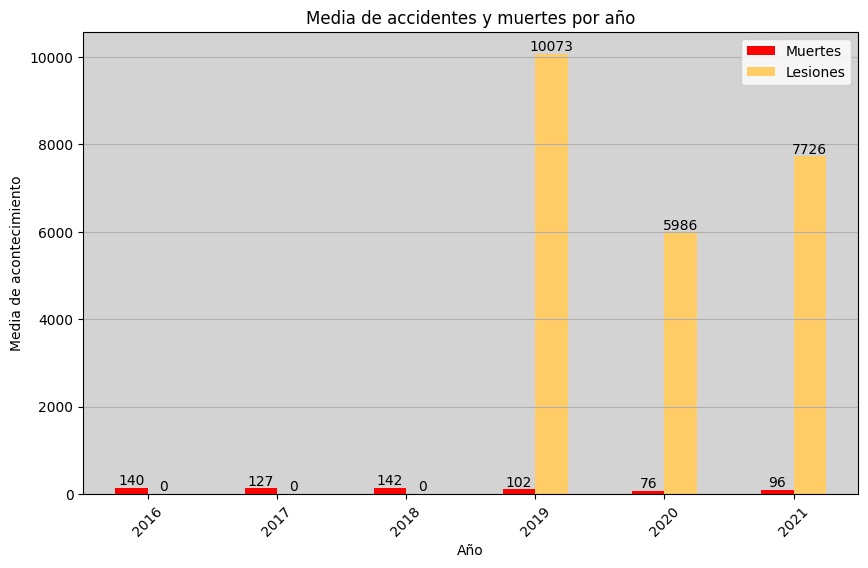

In [472]:
# Filter the DataFrame to include only rows where 'evento_tipo' is 'd' (death)
deaths = events_df[events_df['evento_tipo'] == 'd']
# Group the data by year ('aaaa' column) and calculate the mean number of deaths per year
mean_deaths_per_year = deaths.groupby('aaaa').size().mean()
# Filter the DataFrame to include only rows where 'evento_tipo' is 'l' (lesion)
lesions = events_df[events_df['evento_tipo'] == 'l']
# Group the data by year ('aaaa' column) and calculate the mean number of accidents (including lesions) per year
mean_accidents_per_year = lesions.groupby('aaaa').size().mean()
# Create a DataFrame with mean number of deaths and accidents per year
mean_data = pd.DataFrame({'Muertes': deaths.groupby('aaaa').size(), 'Lesiones': lesions.groupby('aaaa').size()})
# Plot the data
ax = mean_data.plot(kind='bar', figsize=(10, 6), color=['red', (1.0, 0.8, 0.4)])
plt.title('Media de accidentes y muertes por año')
plt.xlabel('Año')
plt.ylabel('Media de acontecimiento')
plt.xticks(rotation=45)
plt.grid(axis='y')

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, str(int(i.get_height())), ha='center', va='bottom')

# plt.gcf().set_facecolor('lightgrey')
ax.set_facecolor('lightgrey')
# Show the plot
plt.show()

*   Parece que no se llevaban cuentas de lesiones en los dataframes al menos hasta el año 2019

In [473]:
# Take the events dataframe to calculate number of victims for each year
grouped_per_year = events_df.groupby(['aaaa', 'evento_tipo'])[['n_victimas']].sum().reset_index()
# Display the resulting DataFrame containing aggregated information about events grouped by year and event type
grouped_per_year


,aaaa,evento_tipo,n_victimas
0,2016,d,142
1,2017,d,135
2,2018,d,148
3,2019,d,103
4,2019,l,11792
5,2020,d,79
6,2020,l,6855
7,2021,d,96
8,2021,l,8957


              aaaa  n_victimas
count     6.000000    6.000000
mean   2018.500000  117.166667
std       1.870829   28.251844
min    2016.000000   79.000000
25%    2017.250000   97.750000
50%    2018.500000  119.000000
75%    2019.750000  140.250000
max    2021.000000  148.000000


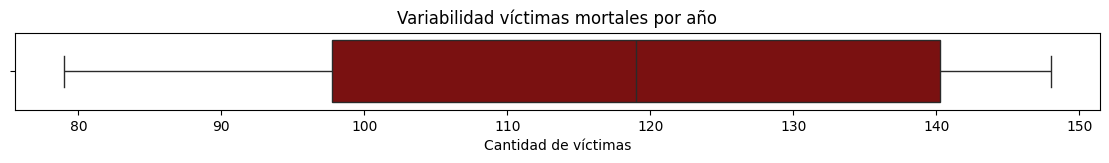

In [474]:
# Calculate and display descriptive statistics for the number of victims in fatal events per year
print(grouped_per_year[grouped_per_year['evento_tipo']=='d'].describe())
# Create a new figure for plotting with a specified size
plt.figure(figsize=(14, 1)) 
# Create a boxplot to visualize the variability in the number of victims of fatal events (muerte) per year
sns.boxplot(data=grouped_per_year[grouped_per_year['evento_tipo']=='d'], x='n_victimas', color='darkred')
# Set the title of the plot
plt.title("Variabilidad víctimas mortales por año")
# Set the label for the x-axis
plt.xlabel("Cantidad de víctimas")
# Display the plot
plt.show()


- Se puede observar que hay una media de 117 de Muertes en el promedio anual
- Y un desvío estándar de 28.2 Muertes

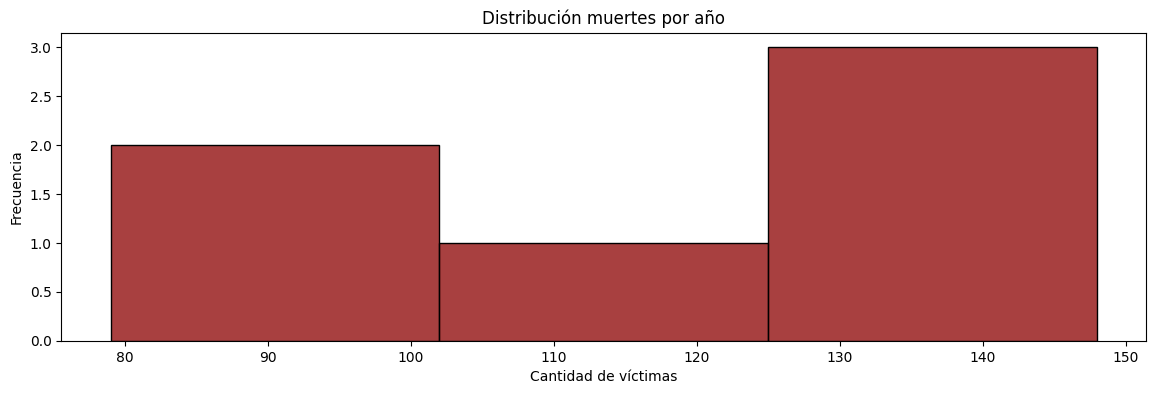

In [475]:
# Variabilidad del número de víctimas
plt.figure(figsize=(14, 4))  
# Create a histogram to visualize the distribution of deaths per year
sns.histplot(data=grouped_per_year[grouped_per_year['evento_tipo']=='d'], x='n_victimas', bins=3, color='darkred')
# Set the title of the plot
plt.title("Distribución muertes por año")
# Set the label for the x-axis
plt.xlabel("Cantidad de víctimas")
# Set the label for the y-axis
plt.ylabel("Frecuencia")
# Display the plot
plt.show()


Podemos observar que tenemos una variabilidad de muertes alta

         aaaa    n_victimas
count     3.0      3.000000
mean   2020.0   9201.333333
std       1.0   2477.552489
min    2019.0   6855.000000
25%    2019.5   7906.000000
50%    2020.0   8957.000000
75%    2020.5  10374.500000
max    2021.0  11792.000000


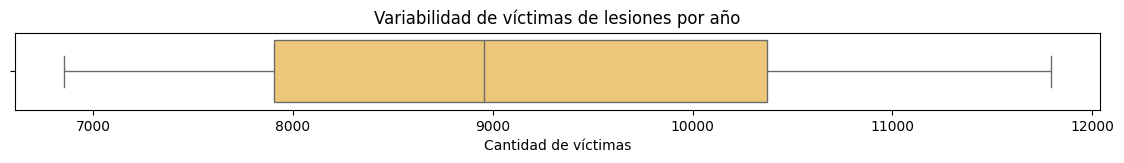

In [476]:
# Calculate and display descriptive statistics for the number of victims in lesion events per year
print(grouped_per_year[grouped_per_year['evento_tipo']=='l'].describe())
# Create a new figure for plotting with a specified size
plt.figure(figsize=(14, 1)) 
# Create a boxplot to visualize the variability in the number of victims of lesion events per year
sns.boxplot(data=grouped_per_year[grouped_per_year['evento_tipo']=='l'], x='n_victimas', color=(1.0, 0.8, 0.4))
# Set the title of the plot
plt.title("Variabilidad de víctimas de lesiones por año")
# Set the label for the x-axis
plt.xlabel("Cantidad de víctimas")
# Display the plot
plt.show()


- Podemos observar que tenemos una media de 9201 de lesiones por año
- Un desvío estándar de 2477

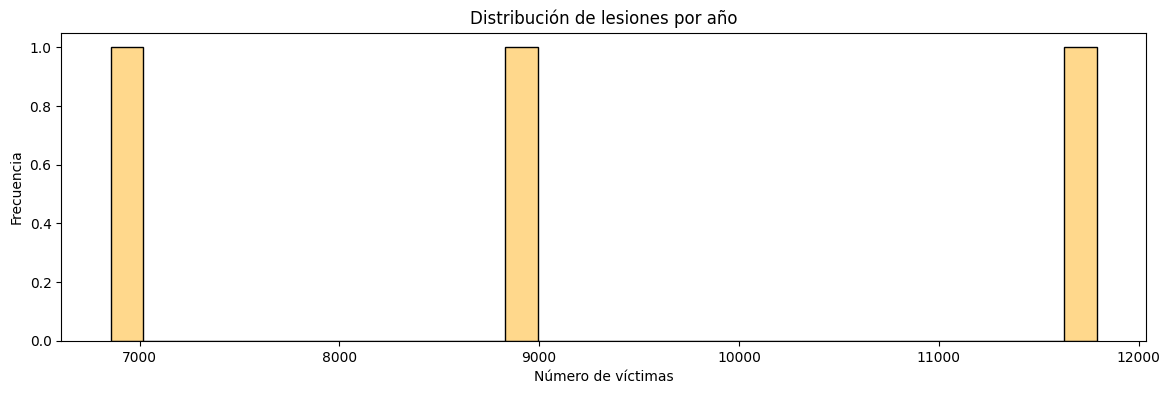

In [477]:
# Variabilidad del número de víctimas de lesiones
plt.figure(figsize=(14, 4))  
# Create a histogram to visualize the distribution of victims of lesion events per year
sns.histplot(data=grouped_per_year[grouped_per_year['evento_tipo']=='l'], x='n_victimas', bins=30, color=(1.0, 0.8, 0.4))
# Set the title of the plot
plt.title("Distribución de lesiones por año")
# Set the label for the x-axis
plt.xlabel("Número de víctimas")
# Set the label for the y-axis
plt.ylabel("Frecuencia")
# Display the plot
plt.show()


- Se observa que hay una gran variabilidad por año en cuanto a accidentes que causen lesiones por año

### Relaciones entre eventos

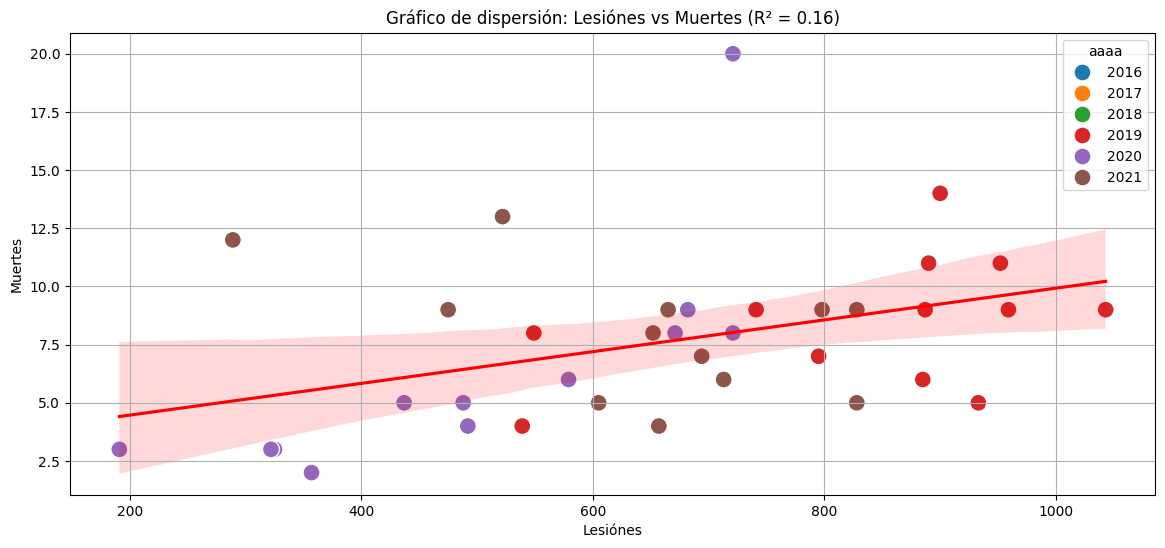

In [500]:
# Create a pivot table to summarize the counts of events by year and period, separated by event type
pivot_df = pd.pivot_table(events_df,  index=['aaaa', 'period'], columns='evento_tipo', values='id', aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False).reset_index()
# Create a scatter plot to compare the number of lesions and deaths for each year
plt.figure(figsize=(14, 6))
palette = sns.color_palette("tab10", n_colors=6)
sns.scatterplot(data=pivot_df, x='l', y='d', hue='aaaa', palette=palette, s=150)  # Adjust the size of the points
sns.regplot(data=pivot_df, x='l', y='d', scatter=False, line_kws={"color": "red"})  # Add a regression line
correlation_matrix = pivot_df[['l', 'd']].corr()  # Calculate the correlation matrix
r_squared = correlation_matrix.iloc[0, 1] ** 2  # Calculate the R-squared value
plt.title(f'Gráfico de dispersión: Lesiónes V.S. Muertes (R² = {r_squared:.2f})')  # Set the title of the plot with the R-squared value
plt.xlabel('Lesiónes')  # Set the label for the x-axis
plt.ylabel('Muertes')  # Set the label for the y-axis
plt.grid(True)  # Show gridlines on the plot
plt.show()  # Display the plot

- Se puede inferir que hay una relación de tendencia positiva
- 2021 es uno de los años más dispersos, seguido de 2019

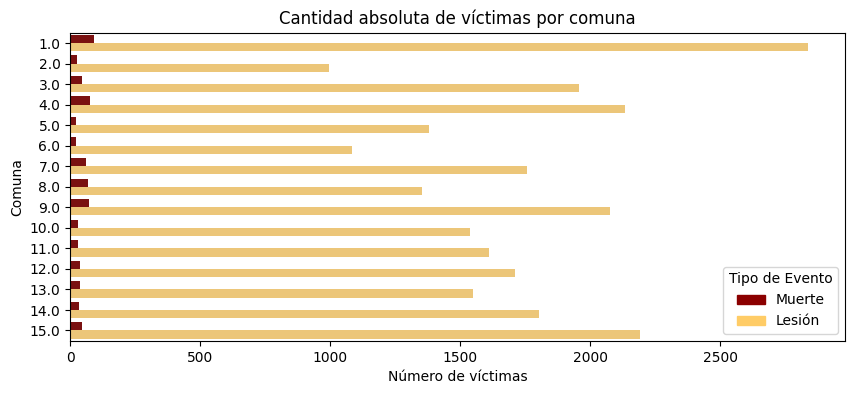

In [516]:
from matplotlib.patches import Patch
# Cantidad total de víctimas por comuna
df_comuna = events_df.groupby(['comuna', 'evento_tipo'])[['n_victimas']].sum().reset_index()
df_comuna['comuna'] = df_comuna['comuna'].astype('category')
colors = {'d': 'darkred', 'l': (1.0, 0.8, 0.4)}
legend_labels = {'d': 'Muerte', 'l': 'Lesión'}
# Create a grouped bar plot with customized legend labels and colors
plt.figure(figsize=(10, 4)) 
sns.barplot(data=df_comuna, y='comuna', x='n_victimas', hue='evento_tipo', dodge=True, palette=colors, hue_order=['d', 'l'])
plt.title("Cantidad absoluta víctimas por comuna")
plt.xlabel("Número de víctimas")
plt.ylabel("Nº Comuna")
# Create custom legend handles
legend_handles = [Patch(color=colors[event_type], label=legend_labels[event_type]) for event_type in df_comuna['evento_tipo'].unique()]
plt.legend(handles=legend_handles, title='Tipo de Evento')
plt.show()


- Podemos observar que la comuna número 1 es la comuna que tiene más casos y más muertes
- La comuna 2 es la que menos casos presenta

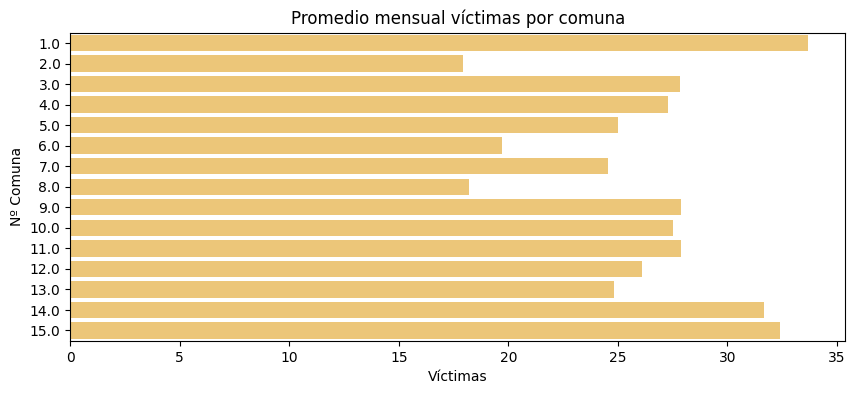

In [521]:
# Calculate the average monthly number of victims per district (comuna) and event type
df_period_comuna = events_df.groupby(['aaaa', 'period', 'comuna', 'evento_tipo'])[['n_victimas']].sum().reset_index()
df_period_comuna = df_period_comuna.sort_values(by='n_victimas', ascending=True)
df_period_comuna['comuna'] = df_period_comuna['comuna'].astype('category')  # Convert 'comuna' to categorical data type

# Create a bar plot to visualize the average monthly number of victims per district and event type
plt.figure(figsize=(10, 4)) 
sns.barplot(data=df_period_comuna, y='comuna', x='n_victimas', errorbar=None, color=(1.0, 0.8, 0.4))
plt.title("Promedio mensual víctimas por comuna")  # Set the title of the plot
plt.xlabel("Víctimas")  # Set the label for the x-axis
plt.ylabel("Nº Comuna")  # Set the label for the y-axis
plt.show()  # Display the plot


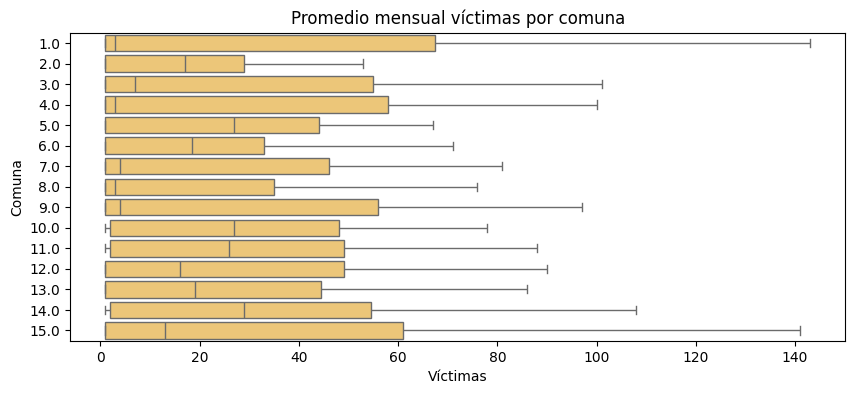

In [524]:
# Create a box plot to visualize the variability in the average monthly number of victims per district
plt.figure(figsize=(10, 4))  
sns.boxplot(data=df_period_comuna, y='comuna', x='n_victimas', color=(1.0, 0.8, 0.4))
plt.title("Promedio mensual víctimas por comuna")  # Set the title of the plot
plt.xlabel("Víctimas")  # Set the label for the x-axis
plt.ylabel("Nº Comuna")  # Set the label for the y-axis
plt.show()  # Display the plot

- Se ven patronces similares entre medias de la comuna 10 y 11
- Las mayores variabilidades entre comunas son 1, 15 y 14

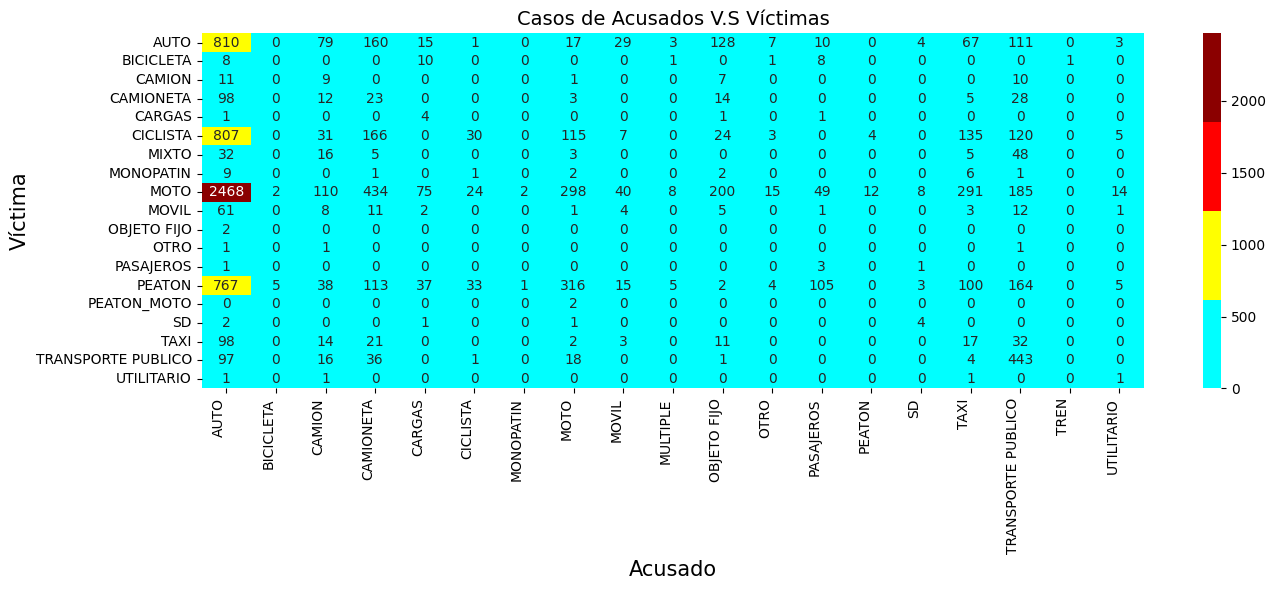

In [529]:
# Select relevant columns from the dataframe
df_av = events_df[['acusado', 'victima', 'evento_tipo', 'n_victimas']]

# Create a pivot table to summarize the total number of victims for each accused-victim pair
pivot_av = df_av.pivot_table(index='victima', columns='acusado', values='n_victimas', aggfunc='sum', fill_value=0)

# Define colors for the heatmap
colors = ["cyan", "yellow", "red", "darkred"]
n_colors = len(colors)
color_map = LinearSegmentedColormap.from_list("custom", colors, N=n_colors)

# Create the heatmap plot
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_av, cmap=color_map, annot=True, fmt='d')  # Annotate cells with the number of victims
plt.title('Casos de Acusados V.S Víctimas', fontsize=14)  # Set the title of the plot
plt.xlabel('Acusado', fontsize=15)  # Set the label for the x-axis
plt.ylabel('Víctima', fontsize=15)  # Set the label for the y-axis
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

- Se puede observar que los autos han tenido la mayor parte de accidentes, y principalmente el mayór número de vícimtas son las motos

## Conclusiones
---

Las conclusiones a las que se eha llegado son:
* Existe un promedio de 119 víctimas mortales por año
* El resto de víctimas lesionadas son de 9200 en promedio al año
* El año que tiene menos eventos es 2020
* Por el contrario 2019 y 2021 tienen una mayor cantidad de casos
* La desviación estándar de muertes es más baja, comparada con la de lesiones, que es bastante alta
* La comuna 1 tienen el mayor promedio de eventos mensuales
* Los autos son los que más accidentes causan
* Las motos son mayormente las víctimas